<a href="https://colab.research.google.com/github/matpg/RL-Agent-for-Unreal-Engine-4/blob/main/Prueba_de_modelo_en_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tempfile

from matplotlib import pyplot as plt
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.platform import gfile
import cv2


TensorFlow 1.x selected.


In [2]:
print(tf.version.VERSION)

1.15.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1, 72, 72, 3)


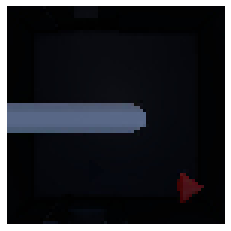

In [600]:
'''

'''

def img_route(obsdnumpy_folder, number_ob):
  file = '/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet/archivos de observaciones/obsnumpy'+str(obsdnumpy_folder)+"/puzzle("+str(number_ob)+").jpg"
  img = tf.keras.preprocessing.image.load_img(file, target_size=[72, 72])
  img_to_test = tf.keras.preprocessing.image.img_to_array(img)
  img_to_test = np.array(img_to_test).reshape(1, 72, 72, 3)
  print(img_to_test.shape)
  return img_to_test, img

n_folder = 5
image_test_index = 3
image_to_test, image_to_plt = img_route(n_folder, image_test_index)

def print_images(image):
  plt.imshow(image)
  plt.axis('off')

print_images(image_to_plt)
# EN UE4, SE PODRIA GENERAR LA IMAGEN NEGRA, Y 
# LUEGO, CON DIRECCIONES O PUNTOS DE REFERENCIA DADAS,
# GENERAR EL TRINGULO DEL AGENTE EN COLOR ROJO

In [ ]:
'''
  CARGA DE ARCHIVOS DE OBSERVACION EN FORMATO NUMPY
  IMPRESION DE ARRAYS A IMAGENES

  OBS NUMPY 1:
  00 - 16 
  17 - 26
  27 - 39

  OBS NUMPY 3
  EP1:
    51 - 53
    100
    277 - 288

  OBS NUMPY 4
  EP1:
    00 - 05
  EP2:
    07 - 31

    OBS NUMPY 6
  EP1:
    00 - 20
  EP2:
    21 - 42
  EP3:
    43 - 63
  EP4:
    64 - 81
  EP5:
    82 - 99



'''

def obs_route(obsdnumpy_folder, number_ob):
  file = "/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet/archivos de observaciones/obsnumpy"+str(obsdnumpy_folder)+"/obs_array("+str(number_ob)+").npy"
  obs = np.load(file)
  # print(obs)
  # print(obs.shape)
  # np.reshape(obs, newshape=[72, 72, 3])
  obs_img = obs[0]
  return obs, obs_img 

n_folder = 6

image_test_index = 99
image_to_test, image_to_plt  = obs_route(n_folder, image_test_index)

def print_images(image):
  #image *= 255
  plt.imshow(image)
  plt.axis('off')

'''
  PROBAR CON PROGRAMAR ESTE ENTORNO CON EL AGENTE Y LA META
  DE LA MISMA FORMA Y POSICION DEL NIVEL UE4

'''
print_images(image_to_plt)


In [601]:
'''
  MODELO TENSORFLOW EN 1.X
  FORMATO PROTOBUF
  INPUT: N, 72, 72, 3
'''
# MODELO PARA ENTORNOS GENERALES
path_model_1 = "/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet/archivos modelo ts/agentnet modelo general"
# MODELO PARA ENTORNO SIMULADO DE UE4
path_model_2 = "/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet/archivos modelo ts/agentnet modelo simulado"

model_paths = [path_model_1, path_model_2]
path_to_test_model = 1
agentnet_save_path = model_paths[path_to_test_model-1]
 
with tf.Session(graph=tf.Graph()) as sess:
  tf.saved_model.loader.load(sess, ["serve"], agentnet_save_path)    
  graph = tf.get_default_graph()
  # print(graph.get_operations())
  # print(graph.get_all_collection_keys())
  out = sess.run('output/Softmax:0', feed_dict={'input/Ob:0':image_to_test})
  print(out)
  most_prob_action = np.argmax(out)
  if most_prob_action == 0 : print('You have to turn left.')
  if most_prob_action == 1 : print('You have to turn right.')
  if most_prob_action == 2 : print('You have to move forward.')
  if most_prob_action == 3 : print('You have to do pick up an object.')
  if most_prob_action == 4 : print('You have to do drop the object.')
  if most_prob_action == 5 : print('You have to toggle/interact with object.')
  if most_prob_action == 6 : print('Scnario done.')

  # sess.run('output/Softmax:0'

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/Colab Notebooks/modelo ts agentnet/archivos modelo ts/agentnet modelo general/variables/variables
[[1.1931281e-15 0.0000000e+00 1.0000000e+00 2.9125269e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
You have to move forward.


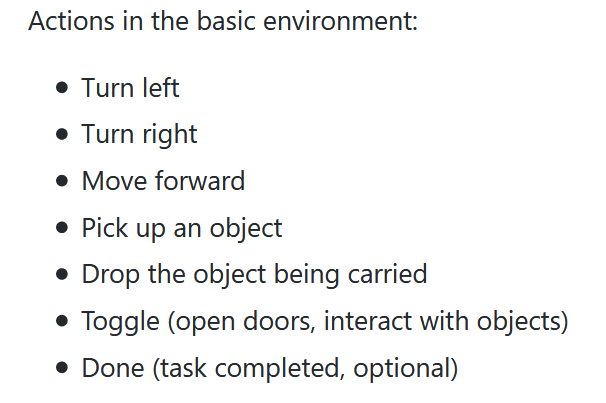

In [ ]:
rand_img = np.random.rand(1, 72, 72, 3)
rand_img2 = rand_img * 9.1

In [ ]:
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

In [ ]:
#TENSORFLOW 2
agentnet_save_path = "/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet"
loaded = tf.saved_model.load(sess=None, tags=['serve'], export_dir=agentnet_save_path)
print(list(loaded.signatures.keys()))  # ["serving_default"]

In [ ]:
agentnet = loaded

In [ ]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'action': <tf.Tensor 'output/Softmax:0' shape=(None, 7) dtype=float32>}


In [ ]:
%cd {agentnet_save_path}

/content/drive/MyDrive/Colab Notebooks/modelo ts agentnet


In [ ]:
!saved_model_cli show --dir . --tag_set serve

In [ ]:
new_model = tf.keras.models.load_model(agentnet_save_path)
# Check its architecture
new_model

In [ ]:
#TENSORFLOW 2.0

img = cv2.imread(file)
flag, bts = cv2.imencode('.jpg', img)
inp = [bts[:,0].tobytes()]
loaded = tf.saved_model.load(export_dir=agentnet_save_path)
infer = loaded.signatures["serving_default"]
print(infer.graph)
print(infer.inputs)
print(infer.outputs)
print(infer.structured_input_signature)
print(infer.structured_outputs)
print(infer.name)
print(infer.variables)
out = infer(key=tf.constant(''), image_bytes=tf.constant(img))